<h1> Import Dataset

In [34]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise import SVD, KNNBasic
from surprise import accuracy
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

<h1> Load Dataset

In [4]:
customer = pd.read_csv('../dataset/olist_customers_dataset.csv')
geolocation = pd.read_csv('../dataset/olist_geolocation_dataset.csv')
order_items = pd.read_csv('../dataset/olist_order_items_dataset.csv')
order_payments = pd.read_csv('../dataset/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('../dataset/olist_order_reviews_dataset.csv')
orders = pd.read_csv('../dataset/olist_orders_dataset.csv')
products = pd.read_csv('../dataset/olist_products_dataset.csv')
sellers = pd.read_csv('../dataset/olist_sellers_dataset.csv')
product_category_name_translation = pd.read_csv('../dataset/product_category_name_translation.csv')

print('Jumlah data customer:', customer.shape)
print('Jumlah data geolocation:', geolocation.shape)
print('Jumlah data order_items:', order_items.shape)
print('Jumlah data order_payments:', order_payments.shape)
print('Jumlah data order_reviews:', order_reviews.shape)
print('Jumlah data orders:', orders.shape)
print('Jumlah data products:', products.shape)
print('Jumlah data sellers:', sellers.shape)
print('Jumlah data product_category_name_translation:', product_category_name_translation.shape)

Jumlah data customer: (99441, 5)
Jumlah data geolocation: (1000163, 5)
Jumlah data order_items: (112650, 7)
Jumlah data order_payments: (103886, 5)
Jumlah data order_reviews: (99224, 7)
Jumlah data orders: (99441, 8)
Jumlah data products: (32951, 9)
Jumlah data sellers: (3095, 4)
Jumlah data product_category_name_translation: (71, 2)


**Insight**
- Setelah dilakukan load data seluruh dataset yang ada dari kaggle ini, sample data paling banyak ada di geolocation
- Selanjutnya mencoba untuk melakukan Exploratory Data Analysis untuk mengetahui isi dari dataset

<h1>Univariate EDA

In [5]:
customer.info()
geolocation.info()
order_items.info()
order_payments.info()
order_reviews.info()
orders.info()
products.info()
sellers.info()
product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  

**Insight**
- Setelah dilakukan info() pada semua dataset kita bisa melihat ada beberapa hal unik disini seperti customer ada 2 id, dan pada setiap dataset sangat detail. mari kita coba explore lebih dalam dengan menampilkan 5 data awal pada setiap dataset

In [6]:
print("Customers Data:")
display(customer.head())

print("\nGeolocation Data:")
display(geolocation.head())

print("\nOrder Items Data:")
display(order_items.head())

print("\nOrder Payments Data:")
display(order_payments.head())

print("\nOrder Reviews Data:")
display(order_reviews.head())

print("\nOrders Data:")
display(orders.head())

print("\nProducts Data:")
display(products.head())

print("\nSellers Data:")
display(sellers.head())

print("\nProduct Category Name Translation Data:")
display(product_category_name_translation.head())

Customers Data:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



Geolocation Data:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP



Order Items Data:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



Order Payments Data:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45



Order Reviews Data:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53



Orders Data:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



Products Data:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



Sellers Data:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP



Product Category Name Translation Data:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight**
- Setelah kita gunakan fungsi head(), kita bisa menyimpulkan beberapa poin penting dari setiap data diantaranya
    - customer merupakan informasi mengenai pelanggan yang memiliki kolom sebagai berikut
    - geolocation merupakan informasi mengenai kode pos dan koordinat geografisnya
    - order_items merupakan informasi detail mengenai setiap item dalam sebuah pesanan
    - order_payments merupakan informasi mengenai metode pembayaran
    - order_reviews merupakan ulasan yang diberikan pelanggan untuk pesanan mereka
    - orders merupakan informasi utama mengenai setiap pesanan. ini adalah tabel sentral yang menghubungkan pelanggan dengan item dan detail pesanan lainnya.
    - products merupakan informasi mengenai produk produk yang dijual
    - sellers merupakan informasi mengenai penjual
    - product_category_name_translation merupakan terjemahan nama kategori produk dari bahasa portugis ke bahasa inggris

--- Visualisasi Distribusi Review Score ---


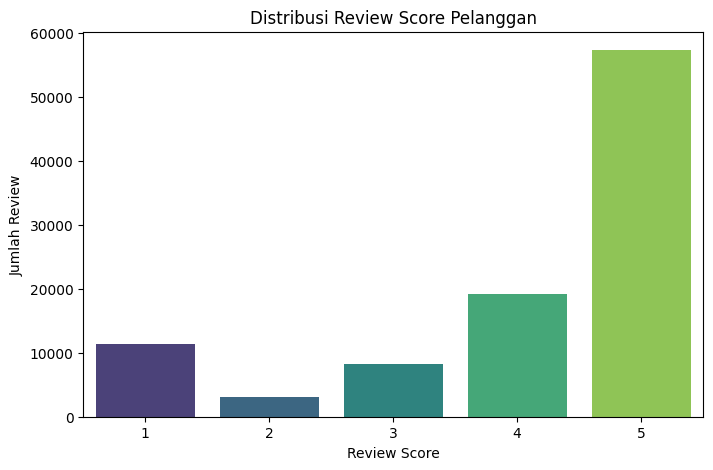

In [35]:
print("--- Visualisasi Distribusi Review Score ---")
plt.figure(figsize=(8, 5))
sns.countplot(x='review_score', data=order_reviews, palette='viridis')
plt.title('Distribusi Review Score Pelanggan')
plt.xlabel('Review Score')
plt.ylabel('Jumlah Review')
plt.show()


--- Visualisasi Produk Terpopuler (Top 10) ---


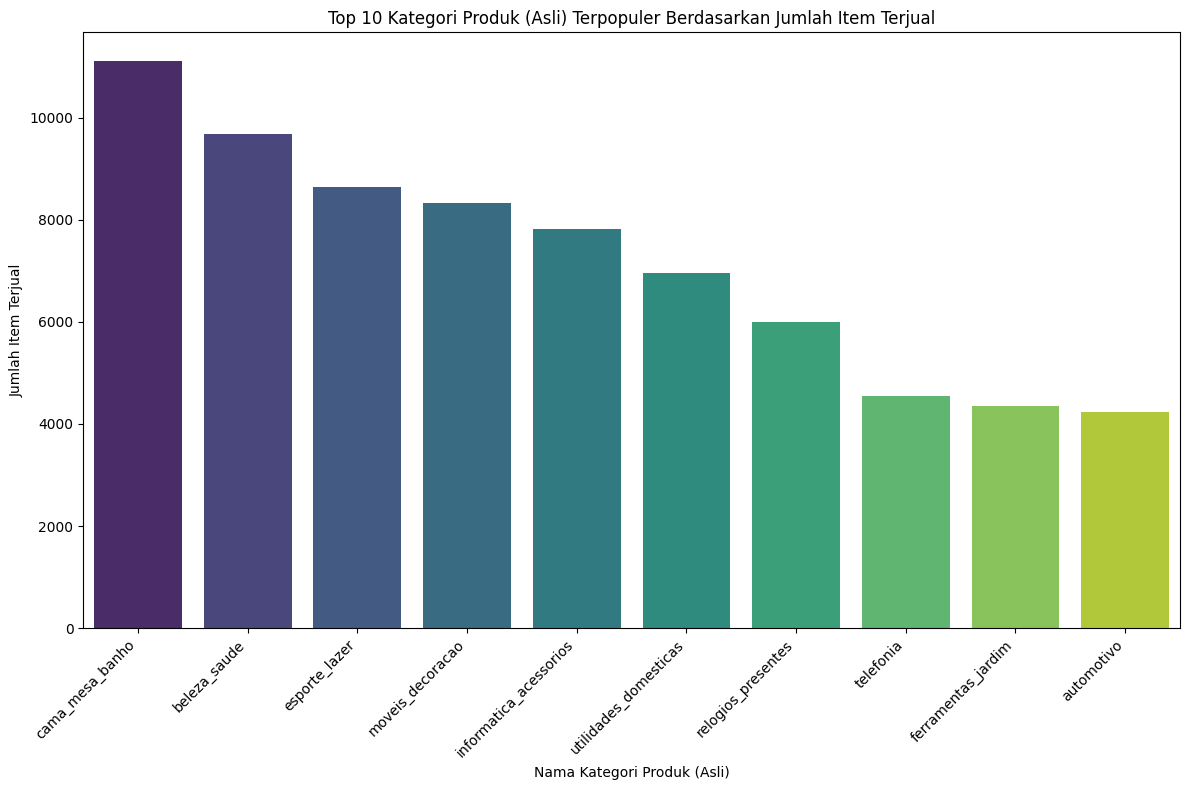

In [37]:
print("\n--- Visualisasi Produk Terpopuler (Top 10) ---")
# Hitung jumlah kemunculan setiap product_id
items_with_category_name_original = pd.merge(
    order_items,
    products[['product_id', 'product_category_name']], # Ambil kolom yang relevan dari products
    on='product_id',
    how='left'
)

# Isi NaN pada product_category_name (jika ada produk tanpa kategori)
# dengan label 'Tidak Diketahui' atau sejenisnya.
items_with_category_name_original['product_category_name'].fillna('Tidak Diketahui', inplace=True)

# 2. Hitung jumlah kemunculan setiap product_category_name
# Ini akan menunjukkan kategori produk (asli) mana yang item-itemnya paling banyak terjual
popular_product_categories_original_sold = items_with_category_name_original['product_category_name'].value_counts().head(10)

plt.figure(figsize=(12, 8)) # Sedikit menambah tinggi figure untuk label yang panjang
sns.barplot(x=popular_product_categories_original_sold.index,
            y=popular_product_categories_original_sold.values,
            palette='viridis', # Mengganti palet warna agar berbeda
            order=popular_product_categories_original_sold.index)
plt.title('Top 10 Kategori Produk (Asli) Terpopuler Berdasarkan Jumlah Item Terjual')
plt.xlabel('Nama Kategori Produk (Asli)')
plt.ylabel('Jumlah Item Terjual')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h1> Data Preprocessing

## Menggabungkan (Merge) orders dan customers

In [7]:
orders_with_customer_unique_id = pd.merge(
    orders,
    customer,
    on='customer_id',
    how='left'
)
print("DF orders_with_customer_unique_id: ")
display(orders_with_customer_unique_id.head())
print(f"Shape: {orders_with_customer_unique_id.shape}")

DF orders_with_customer_unique_id: 


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


Shape: (99441, 12)


In [8]:
orders_with_customer_unique_id.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [9]:
orders_with_customer_unique_id.dropna(inplace=True)
orders_with_customer_unique_id.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

In [10]:
jumlah_customer_unik_di_orders = orders_with_customer_unique_id['customer_unique_id'].nunique()
print(f"Jumlah customer_unique_id unik dalam orders_with_customer_unique_id: {jumlah_customer_unik_di_orders}")

Jumlah customer_unique_id unik dalam orders_with_customer_unique_id: 93342


**Insight**
- Kita bisa liat bahwa tidak semua customer_unique_id ada di orders, sehingga tidak semua customer yang terdaftar tidak melakukan pemesanan

### Pengecekan Orders yang Berhasil

In [11]:
delivered_orders = orders_with_customer_unique_id[orders_with_customer_unique_id['order_status'] == 'delivered'].copy() # Gunakan .copy() untuk menghindari SettingWithCopyWarning
print(f"Jumlah pesanan yang 'delivered': {delivered_orders.shape[0]}")

Jumlah pesanan yang 'delivered': 96455


**Insight**
- Pada data Orders, memiliki order_id sebanyak 99.224 tetapi yang delivered hanya 96.478 yang artinya tidak semua pesanan terkirim. Ada yang shipped, canceled, unavailable, dll.

## Menggabungkan Pesanan dengan order_items

In [12]:
order_details = pd.merge(
    delivered_orders,
    order_items,
    on='order_id',
    how='inner'
)
print("DataFrame order_details(pesanan delivered dengan item produknya): ")
display(order_details.head())
print(f"Shape:{order_details.shape}")

DataFrame order_details(pesanan delivered dengan item produknya): 


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


Shape:(110173, 18)


**Insight**
- Disini kita sudah menggabungkan ke dalam order_details
- order_details sudah memiliki customer_unique_id, order_id, product_id

## Menggabungkan dengan order_reviews

In [13]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [14]:
interactions_df = pd.merge(
    order_details,
    order_reviews[['order_id', 'review_score']], #Ambil review score nya saja yang penting
    on='order_id',
    how='left'
)
print("DataFrame interactions_df (Interaksi pengguna produk dengan review): ")
display(interactions_df.head())
print(f"Shape:{interactions_df.shape}")

#Cek missing values, terutama pada review_score
print("\nMissing values di interactions_df: ")
print(interactions_df.isnull().sum())

DataFrame interactions_df (Interaksi pengguna produk dengan review): 


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,5.0


Shape:(110816, 19)

Missing values di interactions_df: 
order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
review_score                     827
dtype: int64


**Insight**
- Pada review_score terdapat missing values sebanyak 827 dan itu sangat wajar karena tidak semua pelanggan mau memberikan rating
- Untuk saat ini tidak perlu dilakukan penghapusan karena takutnya pada produk tertentu tidak bisa direkomendasikan hanya karena sedikit review namun penjualan banyak
- Namun bisa disimpan secara explicit di variabel khusus untuk yang ada reviewnya (Missing Values dihapus)

In [15]:
df_explicit_ratings = interactions_df.copy()
df_explicit_ratings.dropna(subset=['review_score'], inplace=True)
print(f"Shape interactions_df asli: {interactions_df.shape}" )
print(f"Shape df_explicit_ratings: {df_explicit_ratings.shape}" )

Shape interactions_df asli: (110816, 19)
Shape df_explicit_ratings: (109989, 19)


## Persiapan data product dengan Menggabungkan translation

In [16]:
products_translated = pd.merge(
    products,
    product_category_name_translation,
    on='product_category_name',
    how='left'
)
print("\nDataFrame products_translated (produk dengan kategori bahasa Inggris):")
display(products_translated.head())
print(f"Shape: {products_translated.shape}")

# Cek missing values, terutama pada product_category_name_english
print("\nMissing values di products_translated:")
print(products_translated.isnull().sum())


DataFrame products_translated (produk dengan kategori bahasa Inggris):


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


Shape: (32951, 10)

Missing values di products_translated:
product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64


In [17]:
products_translated.fillna({'product_category_name_english': 'No Category English'}, inplace=True)

## Menggabungkan Semua Informasi menjadi satu DataFrame Besar

In [18]:
products_translated.isnull().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english      0
dtype: int64

In [19]:
product_features_to_merge = products_translated[['product_id', 'product_category_name_english']]

all_data_df = pd.merge(
    df_explicit_ratings,
    product_features_to_merge,
    on='product_id',
    how='left'
)
print("\nDataFrame all_data_df (gabungan interaksi dengan fitur produk):")
display(all_data_df.head())
print(f"Shape: {all_data_df.shape}")

# Cek missing values lagi
print("\nMissing values di all_data_df:")
print(all_data_df.isnull().sum())


DataFrame all_data_df (gabungan interaksi dengan fitur produk):


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_score,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,4.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,4.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,5.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,5.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,5.0,stationery


Shape: (109989, 20)

Missing values di all_data_df:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
review_score                     0
product_category_name_english    0
dtype: int64


**Insight**
- Setelah digabungkan dan dicek missing values seluruh df, dapat dilihat product_category_name_englishnya banyak sekali missing values, namun menurut saya tidak perlu di hapus karena tidak berpengaruh besar untuk sistem rekomendasi product
- DF ini atau all_data_df adalah final data yang akan digunakan untuk membuat siste rekomendasi

<h1> Modelling Collaborative

## Mempersiapkan all_data_df

In [20]:
if 'all_data_df' not in locals() or all_data_df['review_score'].isnull().any():
    print("Pastikan 'all_data_df' sudah ada dan 'review_score' tidak mengandung NaN.")
    # Hentikan atau muat data yang benar di sini
    # Untuk demonstrasi, saya akan buat dummy jika tidak ada:
    if 'all_data_df' not in locals():
        print("Membuat dummy all_data_df untuk TF...")
        dummy_data_tf = {
            'customer_unique_id': [f'cust{i % 1000}' for i in range(20000)],
            'product_id': [f'prod{i % 500}' for i in range(20000)],
            'review_score': [(i % 5) + 1.0 for i in range(20000)] # float
        }
        all_data_df = pd.DataFrame(dummy_data_tf)
        all_data_df = all_data_df.drop_duplicates(subset=['customer_unique_id', 'product_id'])
        # Jika ada kolom product_category_name_english, tambahkan juga
        if 'products_translated' in locals():
             all_data_df = pd.merge(all_data_df, products_translated[['product_id', 'product_category_name_english']], on='product_id', how='left')
        else: # Dummy category
            all_data_df['product_category_name_english'] = [f'cat{i%10}' for i in range(len(all_data_df))]

df_tf = all_data_df[['customer_unique_id', 'product_id', 'review_score']].copy()
print("DataFrame df_tf (untuk model TensorFlow):")
display(df_tf.head())
print(f"Shape: {df_tf.shape}")

DataFrame df_tf (untuk model TensorFlow):


,customer_unique_id,product_id,review_score
0,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,4.0
1,af07308b275d755c9edb36a90c618231,595fac2a385ac33a80bd5114aec74eb8,4.0
2,3a653a41f6f9fc3d2a113cf8398680e8,aa4383b373c6aca5d8797843e5594415,5.0
3,7c142cf63193a1473d2e66489a9ae977,d0b61bfb1de832b15ba9d266ca96e5b0,5.0
4,72632f0f9dd73dfee390c9b22eb56dd6,65266b2da20d04dbe00c5c2d3bb7859e,5.0


Shape: (109989, 3)


In [21]:
# Mengubah customer_unique_id menjadi list tanpa nilai yang sama
customer_ids = df_tf['customer_unique_id'].unique().tolist()
customer_to_customer_encoded = {x: i for i, x in enumerate(customer_ids)}
customer_encoded_to_customer = {i: x for i, x in enumerate(customer_ids)}

# Mengubah product_id menjadi list tanpa nilai yang sama
product_ids_list = df_tf['product_id'].unique().tolist()
product_to_product_encoded = {x: i for i, x in enumerate(product_ids_list)}
product_encoded_to_product = {i: x for i, x in enumerate(product_ids_list)}

# Mapping customer_unique_id dan product_id ke DataFrame
df_tf['customer_encoded'] = df_tf['customer_unique_id'].map(customer_to_customer_encoded)
df_tf['product_encoded'] = df_tf['product_id'].map(product_to_product_encoded)

# Mendapatkan jumlah pengguna dan produk
num_customers = len(customer_to_customer_encoded)
num_products = len(product_to_product_encoded)

# Mengubah rating menjadi nilai float32 (pastikan sudah float)
df_tf['review_score'] = df_tf['review_score'].values.astype(np.float32)

# Nilai minimum dan maksimum rating untuk normalisasi (jika menggunakan sigmoid di output)
min_rating_score = min(df_tf['review_score'])
max_rating_score = max(df_tf['review_score'])

print(f'Number of Customers: {num_customers}')
print(f'Number of Products: {num_products}')
print(f'Min Rating Score: {min_rating_score}')
print(f'Max Rating Score: {max_rating_score}')
print("\nDataFrame df_tf setelah encoding:")
display(df_tf.head())

Number of Customers: 92733
Number of Products: 32066
Min Rating Score: 1.0
Max Rating Score: 5.0

DataFrame df_tf setelah encoding:


,customer_unique_id,product_id,review_score,customer_encoded,product_encoded
0,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,4.0,0,0
1,af07308b275d755c9edb36a90c618231,595fac2a385ac33a80bd5114aec74eb8,4.0,1,1
2,3a653a41f6f9fc3d2a113cf8398680e8,aa4383b373c6aca5d8797843e5594415,5.0,2,2
3,7c142cf63193a1473d2e66489a9ae977,d0b61bfb1de832b15ba9d266ca96e5b0,5.0,3,3
4,72632f0f9dd73dfee390c9b22eb56dd6,65266b2da20d04dbe00c5c2d3bb7859e,5.0,4,4


## Membagi data train dan test

In [22]:
# Mengacak dataset
df_tf_shuffled = df_tf.sample(frac=1, random_state=42)

# Membuat variabel x untuk input model (pasangan indeks pengguna dan produk)
x = df_tf_shuffled[['customer_encoded', 'product_encoded']].values

# Membuat variabel y (rating yang dinormalisasi ke skala 0-1 untuk fungsi aktivasi sigmoid)
# Ini penting jika loss function Anda adalah BinaryCrossentropy
y = df_tf_shuffled['review_score'].apply(lambda r: (r - min_rating_score) / (max_rating_score - min_rating_score)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df_tf_shuffled.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(f"\nData x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"Data x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")
# print("\nContoh x dan y (setelah normalisasi):")
# print(x[:5])
# print(y[:5])


Data x_train shape: (87991, 2), y_train shape: (87991,)
Data x_val shape: (21998, 2), y_val shape: (21998,)


## Training Keras

In [23]:
class RecommenderNet(tf.keras.Model):
  def __init__(self, num_users, num_items, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_items = num_items
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.item_embedding = layers.Embedding(
        num_items,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer=keras.regularizers.l2(1e-6)
    )
    self.item_bias = layers.Embedding(num_items, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    item_vector = self.item_embedding(inputs[:, 1])
    item_bias = self.item_bias(inputs[:, 1])

    dot_user_item = tf.tensordot(user_vector, item_vector, 2)

    x = dot_user_item + user_bias + item_bias
    
    return tf.nn.sigmoid(x)

# Inisialisasi model
embedding_size = 50
model = RecommenderNet(num_customers, num_products, embedding_size)

# Compile model
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# Definisikan callback EarlyStopping
# Menghentikan training jika 'val_loss' tidak membaik selama 3 epoch
# dan mengembalikan bobot terbaik.
early_stopping_callback = EarlyStopping(
    monitor='val_loss',      # Metrik yang dipantau
    patience=3,              # Jumlah epoch tanpa perbaikan sebelum berhenti
    restore_best_weights=True, # Kembalikan bobot dari epoch dengan performa terbaik
    verbose=1                # Tampilkan pesan saat training dihentikan
)

# Memulai training
print("\nMemulai training model...")
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 100, # Naikkan jumlah epoch, EarlyStopping akan menghentikannya jika perlu
    validation_data = (x_val, y_val),
    callbacks=[early_stopping_callback] # Tambahkan callback di sini
)
print("Training selesai.")


Memulai training model...
Epoch 1/100
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 121s 86ms/step - loss: 0.6708 - root_mean_squared_error: 0.4186 - val_loss: 0.5768 - val_root_mean_squared_error: 0.3601
Epoch 2/100
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 115s 84ms/step - loss: 0.5596 - root_mean_squared_error: 0.3423 - val_loss: 0.6104 - val_root_mean_squared_error: 0.3804
Epoch 3/100
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 102s 74ms/step - loss: 0.5376 - root_mean_squared_error: 0.3337 - val_loss: 0.6183 - val_root_mean_squared_error: 0.3846
Epoch 4/100
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 122s 89ms/step - loss: 0.5302 - root_mean_squared_error: 0.3288 - val_loss: 0.6251 - val_root_mean_squared_error: 0.3883
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.
Training selesai.


## Evaluasi Model Keras

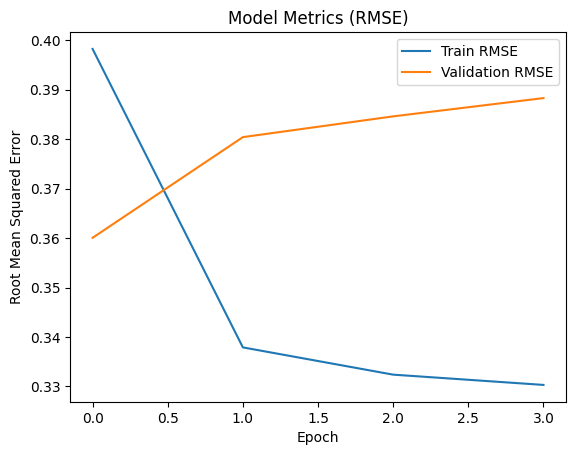

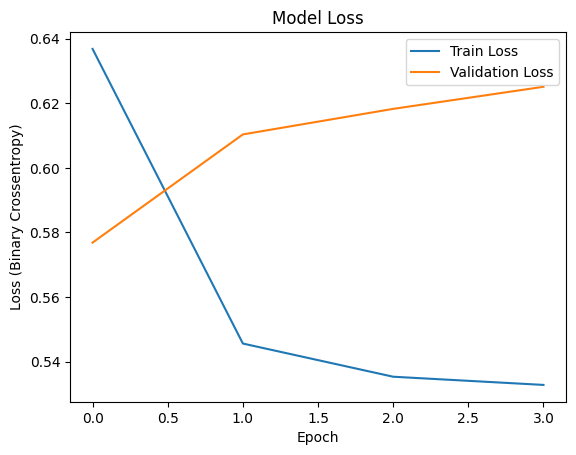

In [24]:
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Model Metrics (RMSE)')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss (Binary Crossentropy)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

## Testing Rekomendasi Hasil Keras

In [25]:
# Asumsikan 'products_translated' adalah DataFrame Anda yang berisi detail produk
# dengan kolom 'product_id' dan 'product_category_name_english' (atau nama produk jika ada)
if 'products_translated' not in locals():
    print("Membuat dummy products_translated untuk rekomendasi...")
    product_ids_unique_list = all_data_df['product_id'].unique()
    dummy_prod_details = {
        'product_id': product_ids_unique_list,
        'product_category_name_english': [f'Category {i%10}' for i in range(len(product_ids_unique_list))],
        'product_name': [f'Product Name {i}' for i in range(len(product_ids_unique_list))] # Tambahkan nama produk jika ada
    }
    products_translated = pd.DataFrame(dummy_prod_details)


# 1. Ambil sampel pengguna secara acak
# Pastikan customer_ids adalah list dari customer_unique_id asli
random_customer_original_id = np.random.choice(customer_ids)
print(f"\nMembuat rekomendasi untuk pengguna: {random_customer_original_id}")

# 2. Dapatkan produk yang sudah pernah dirating/dibeli oleh pengguna ini
# Gunakan df_tf (atau all_data_df asli sebelum encoding jika lebih mudah)
products_visited_by_customer = df_tf[df_tf['customer_unique_id'] == random_customer_original_id]

# 3. Dapatkan semua product_id unik yang ada di dataset produk kita
all_product_ids_available = set(products_translated['product_id'].unique())

# 4. Filter product_id yang sudah di-encode (ada di model)
# Ini penting karena model hanya kenal product_id yang ada saat training
encoded_product_ids_in_model = set(product_to_product_encoded.keys())
available_and_modelled_products = all_product_ids_available.intersection(encoded_product_ids_in_model)

# 5. Buat daftar produk yang BELUM pernah dikunjungi/dirating pengguna ini
# dari produk yang tersedia dan dikenal model
products_not_visited_ids = list(
    available_and_modelled_products - set(products_visited_by_customer['product_id'].values)
)

# 6. Encode produk yang belum dikunjungi dan ID pengguna
user_encoded_id = customer_to_customer_encoded.get(random_customer_original_id)
products_not_visited_encoded = [product_to_product_encoded.get(prod_id) for prod_id in products_not_visited_ids]

# Filter None jika ada produk yang tidak ada di mapping (seharusnya tidak jika logikanya benar)
products_not_visited_encoded = [p_id for p_id in products_not_visited_encoded if p_id is not None]

if not products_not_visited_encoded:
    print("Tidak ada produk baru untuk direkomendasikan kepada pengguna ini (semua produk sudah dikunjungi atau tidak ada produk yang belum dikunjungi).")
else:
    # 7. Buat array input untuk prediksi
    user_product_array_for_pred = np.array([[user_encoded_id] * len(products_not_visited_encoded),
                                            products_not_visited_encoded]).T

    # 8. Dapatkan prediksi rating (skala 0-1)
    predicted_ratings_normalized = model.predict(user_product_array_for_pred).flatten()

    # (Opsional) De-normalisasi rating jika ingin ditampilkan dalam skala asli
    predicted_ratings_original_scale = predicted_ratings_normalized * (max_rating_score - min_rating_score) + min_rating_score

    # 9. Dapatkan top N rekomendasi
    top_n = 10
    # Urutkan berdasarkan prediksi rating (normalized)
    top_ratings_indices = predicted_ratings_normalized.argsort()[-top_n:][::-1]

    recommended_product_encoded_ids = [products_not_visited_encoded[i] for i in top_ratings_indices]
    recommended_product_original_ids = [product_encoded_to_product.get(encoded_id) for encoded_id in recommended_product_encoded_ids]

    print('---' * 9)
    print('Produk dengan rating tinggi dari pengguna (histori):')
    print('---' * 4)
    
    # Ambil detail produk yang pernah dikunjungi dan diurutkan berdasarkan rating
    # Bergabung dengan products_translated untuk mendapatkan nama/kategori
    # Di sini kita perlu 'all_data_df' yang memiliki 'product_category_name_english' dan 'review_score' asli
    if 'product_category_name_english' in products_visited_by_customer.columns:
        top_products_user_visited_details = products_visited_by_customer.sort_values(
            by='review_score',
            ascending=False
        ).head(5)
    else: # Jika all_data_df tidak punya category, gabungkan dulu
        temp_visited_with_details = pd.merge(products_visited_by_customer,
                                             products_translated[['product_id', 'product_category_name_english']], # Tambahkan 'product_name' jika ada
                                             on='product_id',
                                             how='left')
        top_products_user_visited_details = temp_visited_with_details.sort_values(
            by='review_score',
            ascending=False
        ).head(5)


    for index, row in top_products_user_visited_details.iterrows():
        print(f"ID Produk: {row['product_id']}, Kategori: {row.get('product_category_name_english', 'N/A')}, Rating Asli: {row['review_score']}")

    print('---' * 4)
    print(f'Top {top_n} Rekomendasi Produk:')
    print('---' * 4)

    recommended_products_details = products_translated[products_translated['product_id'].isin(recommended_product_original_ids)]
    # Jaga urutan rekomendasi
    recommended_products_details = recommended_products_details.set_index('product_id').loc[recommended_product_original_ids].reset_index()


    for index, row in recommended_products_details.iterrows():
        # Cari prediksi rating yang sesuai untuk produk ini
        idx_in_rec_orig = recommended_product_original_ids.index(row['product_id'])
        pred_rating_norm = predicted_ratings_normalized[top_ratings_indices[idx_in_rec_orig]] # ini agak rumit, harusnya langsung dari sorted
        pred_rating_orig = predicted_ratings_original_scale[top_ratings_indices[idx_in_rec_orig]]

        print(f"ID Produk: {row['product_id']}, Kategori: {row.get('product_category_name_english', 'N/A')}, Prediksi Rating (0-1): {pred_rating_norm:.2f} (Asli: {pred_rating_orig:.2f})")


Membuat rekomendasi untuk pengguna: 3aabcd46c57fb8f84030d1c1e7962bf7
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
---------------------------
Produk dengan rating tinggi dari pengguna (histori):
------------
ID Produk: 47277d35dcfa53f5bee3d98ec3031c8a, Kategori: auto, Rating Asli: 3.0
------------
Top 10 Rekomendasi Produk:
------------
ID Produk: aca2eb7d00ea1a7b8ebd4e68314663af, Kategori: furniture_decor, Prediksi Rating (0-1): 0.58 (Asli: 3.33)
ID Produk: d1c427060a0f73f6b889a5c7c61f2ac4, Kategori: computers_accessories, Prediksi Rating (0-1): 0.58 (Asli: 3.31)
ID Produk: 53b36df67ebb7c41585e8d54d6772e08, Kategori: watches_gifts, Prediksi Rating (0-1): 0.58 (Asli: 3.31)
ID Produk: 154e7e31ebfa092203795c972e5804a6, Kategori: health_beauty, Prediksi Rating (0-1): 0.58 (Asli: 3.30)
ID Produk: 389d119b48cf3043d311335e499d9c6b, Kategori: garden_tools, Prediksi Rating (0-1): 0.58 (Asli: 3.30)
ID Produk: bb50f2e236e5eea0100680137654686c, Kategori: health_beauty, Prediksi Rating (0-1): 0.57 

# Modelling SVD

### Persiapan Dataframe

In [26]:
if 'df_tf' not in locals() or df_tf.empty or df_tf['review_score'].isnull().any():
    print("DataFrame 'df_tf' tidak ditemukan, kosong, atau 'review_score' masih mengandung NaN.")
    print("Pastikan 'df_tf' sudah disiapkan dari langkah sebelumnya dengan benar.")
    print("Membuat contoh df_tf untuk demonstrasi...")
    dummy_data_svd = {
        'customer_unique_id': [f'cust_svd_{i % 1000}' for i in range(20000)],
        'product_id': [f'prod_svd_{i % 500}' for i in range(20000)],
        'review_score': [(i % 5) + 1.0 for i in range(20000)] # float, skala asli
    }
    df_tf_for_surprise = pd.DataFrame(dummy_data_svd)
    df_tf_for_surprise = df_tf_for_surprise.drop_duplicates(subset=['customer_unique_id', 'product_id'])
    print(f"Contoh df_tf_for_surprise dibuat dengan shape: {df_tf_for_surprise.shape}")
else:
    # Gunakan df_tf
    df_tf_for_surprise = df_tf.copy() # Buat salinan
    print(f"Menggunakan df_tf yang sudah ada dengan shape: {df_tf_for_surprise.shape}")

if df_tf_for_surprise.empty:
    print("DataFrame untuk Surprise kosong. Tidak bisa melanjutkan.")
else:
    print("DataFrame siap untuk diproses oleh Surprise.")
    display(df_tf_for_surprise.head())

Menggunakan df_tf yang sudah ada dengan shape: (109989, 5)
DataFrame siap untuk diproses oleh Surprise.


,customer_unique_id,product_id,review_score,customer_encoded,product_encoded
0,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,4.0,0,0
1,af07308b275d755c9edb36a90c618231,595fac2a385ac33a80bd5114aec74eb8,4.0,1,1
2,3a653a41f6f9fc3d2a113cf8398680e8,aa4383b373c6aca5d8797843e5594415,5.0,2,2
3,7c142cf63193a1473d2e66489a9ae977,d0b61bfb1de832b15ba9d266ca96e5b0,5.0,3,3
4,72632f0f9dd73dfee390c9b22eb56dd6,65266b2da20d04dbe00c5c2d3bb7859e,5.0,4,4


### Mendefinisikan Reader dan Memuat Data ke Surprise

In [27]:
from surprise import Reader, Dataset 
from surprise.model_selection import train_test_split 

if not df_tf_for_surprise.empty:
    min_rating_val = df_tf_for_surprise['review_score'].min()
    max_rating_val = df_tf_for_surprise['review_score'].max()
    print(f"Skala rating yang terdeteksi: {min_rating_val} - {max_rating_val}")
    reader = Reader(rating_scale=(min_rating_val, max_rating_val))

    print("\nMemuat data dari DataFrame ke format Dataset Surprise...")
    # Surprise membutuhkan kolom dalam urutan: userID, itemID, rating
    data_surprise = Dataset.load_from_df(
        df_tf_for_surprise[['customer_unique_id', 'product_id', 'review_score']],
        reader
    )
    print("Data berhasil dimuat.")
else:
    print("DataFrame df_tf_for_surprise kosong, lewati pemuatan data ke Surprise.")

Skala rating yang terdeteksi: 1.0 - 5.0

Memuat data dari DataFrame ke format Dataset Surprise...
Data berhasil dimuat.


### Membagi Data menjadi Train dan Test Set

In [28]:
if 'data_surprise' in locals():
    trainset_surprise, testset_surprise = train_test_split(data_surprise, test_size=0.2, random_state=42)
    print("Data berhasil dibagi menjadi trainset dan testset.")
    print(f"Jumlah pengguna di trainset_surprise: {trainset_surprise.n_users}")
    print(f"Jumlah item di trainset_surprise: {trainset_surprise.n_items}")
    print(f"Jumlah data di testset_surprise: {len(testset_surprise)}")
else:
    print("Objek data_surprise tidak ada, pembagian data dilewati.")

Data berhasil dibagi menjadi trainset dan testset.
Jumlah pengguna di trainset_surprise: 76137
Jumlah item di trainset_surprise: 28340
Jumlah data di testset_surprise: 21998


### Melatih Model SVD

In [29]:
from surprise import SVD 

if 'trainset_surprise' in locals():
    # Inisialisasi model SVD
    # Parameter ini bisa di-tune menggunakan GridSearchCV untuk hasil yang lebih baik
    algo_svd = SVD(n_factors=100, n_epochs=20, lr_all=0.005, reg_all=0.02, random_state=42, verbose=False)

    print("Memulai pelatihan model SVD...")
    algo_svd.fit(trainset_surprise)
    print("Pelatihan SVD selesai.")
else:
    print("Trainset Surprise tidak ada, pelatihan model SVD dilewati.")

Memulai pelatihan model SVD...
Pelatihan SVD selesai.


### Membuat prediksi dan mengevaluasi model SVD

In [30]:
from surprise import accuracy

if 'algo_svd' in locals() and 'testset_surprise' in locals():
    print("Membuat prediksi pada test set dengan SVD...")
    predictions_svd = algo_svd.test(testset_surprise)

    print("\nMengevaluasi model SVD...")
    rmse_svd = accuracy.rmse(predictions_svd, verbose=True) # verbose=True untuk print langsung
    mae_svd = accuracy.mae(predictions_svd, verbose=True)

    print(f"\nHasil Akhir SVD - RMSE: {rmse_svd:.4f}")
    print(f"Hasil Akhir SVD - MAE: {mae_svd:.4f}")
else:
    print("Model SVD atau testset_surprise tidak ada, evaluasi dilewati.")

Membuat prediksi pada test set dengan SVD...

Mengevaluasi model SVD...
RMSE: 1.2226
MAE:  0.9568

Hasil Akhir SVD - RMSE: 1.2226
Hasil Akhir SVD - MAE: 0.9568


### Fungsi untuk mendapatkan rekomendasi Top-N

In [31]:
def get_top_n_recommendations_svd(algo, user_id_original, n=10, trainset=None, all_product_ids_original=None):
    if trainset is None or all_product_ids_original is None:
        print("Trainset dan daftar semua ID produk asli dibutuhkan untuk rekomendasi Top-N.")
        return []

    # Dapatkan ID internal pengguna dari ID asli
    try:
        user_inner_id = trainset.to_inner_uid(user_id_original)
    except ValueError:
        # Kita bisa mencoba memprediksi untuk semua item.
        items_rated_by_user_inner_ids = [] 
        pass # Lanjutkan untuk mencoba prediksi, cocok untuk pengguna baru yang tidak ada di trainset
    # Dapatkan item yang sudah dirating pengguna dari trainset (jika pengguna ada di trainset)
    if 'user_inner_id' in locals() and user_inner_id is not None:
         items_rated_by_user_inner_ids = [item_inner_id for (item_inner_id, _) in trainset.ur[user_inner_id]]
    else:
        items_rated_by_user_inner_ids = []


    predictions_for_user = []
    for product_id_original in all_product_ids_original:
        try:
            item_inner_id = trainset.to_inner_iid(product_id_original) # Cek apakah item ada di trainset
            if item_inner_id not in items_rated_by_user_inner_ids:
                predicted_rating = algo.predict(user_id_original, product_id_original).est
                predictions_for_user.append((product_id_original, predicted_rating))
        except ValueError:
            predicted_rating = algo.predict(user_id_original, product_id_original).est
            # Hanya tambahkan jika kita ingin merekomendasikan produk yang mungkin tidak ada di trainset
            # Cek apakah produk ini sudah dirating (jika user_id_original ada di df_tf_for_surprise)
            if not df_tf_for_surprise[(df_tf_for_surprise['customer_unique_id'] == user_id_original) & (df_tf_for_surprise['product_id'] == product_id_original)].empty:
                pass # Sudah dirating, jangan rekomendasikan
            else:
                predictions_for_user.append((product_id_original, predicted_rating))
            # pass

    predictions_for_user.sort(key=lambda x: x[1], reverse=True)
    top_n_recs = predictions_for_user[:n]
    print(f"Fungsi get_top_n_recommendations_svd siap digunakan.")
    return top_n_recs

if 'algo_svd' not in locals():
    print("Model algo_svd belum dilatih untuk testing fungsi get_top_n_recommendations_svd.")
else:
    _ = get_top_n_recommendations_svd(algo_svd, 'dummy_user_id', n=1, trainset=(trainset_surprise if 'trainset_surprise' in locals() else None), all_product_ids_original=(['dummy_prod_id'] if 'trainset_surprise' in locals() else None))

Fungsi get_top_n_recommendations_svd siap digunakan.


### Contoh Penggunaan Fungsi Rekomendasi

In [32]:
if ('products_translated' in locals() and not products_translated.empty and
    'df_tf_for_surprise' in locals() and not df_tf_for_surprise.empty and
    'algo_svd' in locals() and 'trainset_surprise' in locals()):

    all_unique_product_ids_original = products_translated['product_id'].unique().tolist()

    # Ambil satu sample_user_id_svd dari df_tf_for_surprise yang ADA di trainset_surprise untuk contoh yang lebih baik
    # atau biarkan random jika ingin menguji kasus pengguna yang mungkin tidak ada di trainset
    try:
        # Mencoba mengambil pengguna yang ada di trainset
        first_user_inner_id = list(trainset_surprise.all_users())[0]
        sample_user_id_svd = trainset_surprise.to_raw_uid(first_user_inner_id)
        print(f"Mengambil pengguna sampel dari trainset: {sample_user_id_svd}")
    except:
        # Fallback jika trainset kosong atau ada masalah lain
        sample_user_id_svd = df_tf_for_surprise['customer_unique_id'].sample(1).iloc[0]
        print(f"Mengambil pengguna sampel secara acak: {sample_user_id_svd}")


    print(f"\nMembuat Top-N rekomendasi SVD untuk pengguna: {sample_user_id_svd}")
    top_n_recs_svd = get_top_n_recommendations_svd(
        algo_svd,
        sample_user_id_svd,
        n=10,
        trainset=trainset_surprise,
        all_product_ids_original=all_unique_product_ids_original
    )

    if top_n_recs_svd:
        print(f"\nTop 10 rekomendasi produk untuk pengguna {sample_user_id_svd} (Model SVD):")
        # Siapkan data produk untuk join informasi kategori dengan lebih efisien
        product_details_dict = products_translated.set_index('product_id')['product_category_name_english'].to_dict()

        for product_id, predicted_rating in top_n_recs_svd:
            category_info = product_details_dict.get(product_id, "N/A (Kategori tidak ditemukan)")
            print(f"  ID Produk: {product_id}, Kategori: {category_info}, Prediksi Rating: {predicted_rating:.2f}")
    else:
        print(f"Tidak dapat menghasilkan rekomendasi untuk pengguna {sample_user_id_svd} dengan SVD.")
else:
    print("Variabel yang dibutuhkan (products_translated, df_tf_for_surprise, algo_svd, trainset_surprise) tidak ditemukan/kosong.")
    print("Pastikan semua tahap sebelumnya sudah dijalankan dengan benar.")

Mengambil pengguna sampel dari trainset: d615a46ee39d41088222d36e46fb5c03

Membuat Top-N rekomendasi SVD untuk pengguna: d615a46ee39d41088222d36e46fb5c03
Fungsi get_top_n_recommendations_svd siap digunakan.

Top 10 rekomendasi produk untuk pengguna d615a46ee39d41088222d36e46fb5c03 (Model SVD):
  ID Produk: c7b3cf9de7be95b3e09e7a63315685eb, Kategori: luggage_accessories, Prediksi Rating: 4.82
  ID Produk: f889fb87b505b73de10c18b93352469f, Kategori: health_beauty, Prediksi Rating: 4.79
  ID Produk: a298a105818dce6878b787e4af6cff7d, Kategori: baby, Prediksi Rating: 4.79
  ID Produk: f8b624d4e475bb8d1bddf1b65c6a64f6, Kategori: housewares, Prediksi Rating: 4.78
  ID Produk: 6a8631b72a2f8729b91514db87e771c0, Kategori: electronics, Prediksi Rating: 4.74
  ID Produk: 425db55cb3b0f5b18a2d9964da31c3c0, Kategori: stationery, Prediksi Rating: 4.74
  ID Produk: f7f59e6186e10983a061ac7bdb3494d6, Kategori: housewares, Prediksi Rating: 4.74
  ID Produk: 7e97894cc00196a56d6ec315c68b2353, Kategori: spor